# Dividir el dataset en conjunto de entrenamiento y testing

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [50]:
url_data = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/ads/Advertising.csv'
data = pd.read_csv(url_data)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [51]:
a = np.random.randn(len(data))

(array([ 4., 10., 12., 36., 39., 41., 29., 19.,  7.,  3.]),
 array([-2.77346622, -2.20137408, -1.62928193, -1.05718978, -0.48509764,
         0.08699451,  0.65908665,  1.2311788 ,  1.80327094,  2.37536309,
         2.94745523]),
 <a list of 10 Patch objects>)

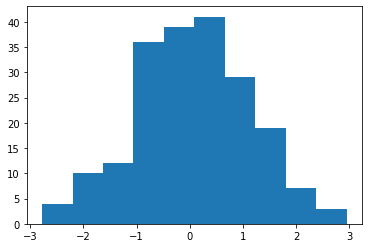

In [52]:
plt.hist(a)

In [53]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [54]:
lm = smf.ols(formula = 'Sales~TV+Radio', data = training).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     735.7
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           2.70e-77
Time:                        11:39:18   Log-Likelihood:                -284.05
No. Observations:                 150   AIC:                             574.1
Df Residuals:                     147   BIC:                             583.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0054      0.317      9.474      0.000       2.378       3.632
TV             0.0472      0.002     29.679      0.000       0.044       0.050
Radio          0.1807      0.009     19.508      0.000       0.162       0.199
==============================================================================
Omnibus:                       59.548   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.607
Skew:                          -1.532   Prob(JB):                     4.08e-42
Kurtosis:                       7.594   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Validación del modelo con el conjunto de testing

In [55]:
sales_pred = lm.predict(testing)
sales_pred

4      13.495472
5      12.250631
18      9.977163
25     16.054121
27     17.362047
32      7.866985
33     19.162567
35     17.475479
42     21.876073
46      9.030333
47     21.833027
49      8.278708
58     21.922034
61     23.060518
72     10.232941
76      4.593204
77     13.845299
81     15.071534
92     19.339249
94     10.606998
95     16.426744
96     12.970081
98     24.329551
99     16.924305
102    18.063551
114    15.153641
121     7.813626
123    15.070134
129     7.988137
131    16.054350
135    13.777632
139    19.669033
142    19.417291
146    15.663822
148    12.080738
152    16.547195
161    13.520571
165    14.694757
166    10.643651
167    13.711712
172     7.562350
173    12.241384
179    12.633065
184    18.840128
185    20.835126
190    12.296111
191     8.522280
193    18.470933
194    16.507082
199    15.520852
dtype: float64

In [56]:
SSD = sum((testing['Sales'] - sales_pred)**2)
SSD

177.93618490673776

In [57]:
RSE = np.sqrt(SSD/(len(testing) - 2 - 1))
RSE

1.9457328374192182

In [58]:
RSE/np.mean(testing['Sales'])

0.13679224110090119